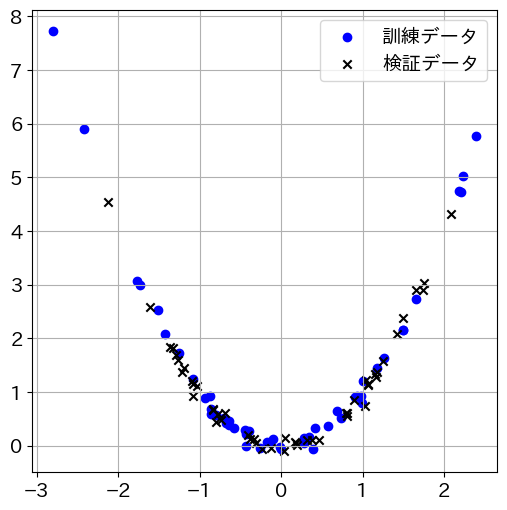

epoch = 0  loss = 5.3256
epoch = 100  loss = 3.6089
epoch = 200  loss = 3.2677
epoch = 300  loss = 3.2211
epoch = 400  loss = 3.2160


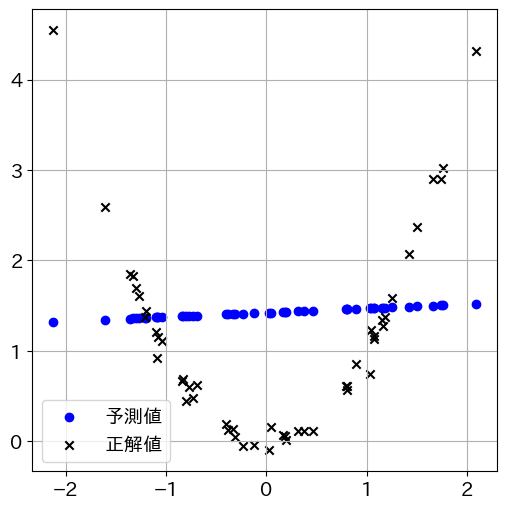

l1.weight =  [[ 0.20226067]
 [ 0.31680453]
 [ 0.35740206]
 [-0.599337  ]
 [ 0.60150605]
 [ 0.03769645]
 [-0.85220546]
 [-0.5042219 ]
 [-0.7067006 ]
 [ 0.9554983 ]]
l1.bias =  [ 0.0106086  -0.27053535 -0.69579184  0.95144296  0.63210195  0.05507247
 -0.22472006 -0.94497573  0.17163023 -0.7836866 ]
l2.weight =  [[-0.06066969  0.13271748  0.15837368 -0.16839275  0.15544005  0.13575234
   0.25065798 -0.05629995 -0.03523405 -0.2493821 ]
 [-0.1449223   0.04841265 -0.05671043 -0.2451998  -0.14397907  0.23733455
   0.15514974  0.01629055  0.21346034 -0.08683836]
 [-0.2939253   0.13620059 -0.24327575 -0.06752003 -0.25784218  0.24203593
  -0.22546504 -0.10013794 -0.0398914   0.02489098]
 [-0.21795237 -0.08726182  0.24393414 -0.37071607 -0.07250695  0.22778413
   0.26529855  0.05176673 -0.06462871 -0.26568305]
 [-0.26740018 -0.01983108  0.29334065 -0.3335357  -0.15053365  0.1845291
  -0.23782219  0.33850548 -0.01829822 -0.07888503]
 [ 0.06275562  0.0513095   0.09700578 -0.15009598  0.28652573  0.

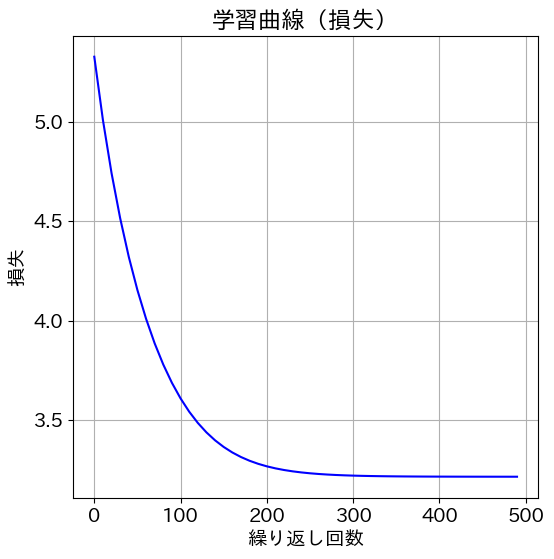

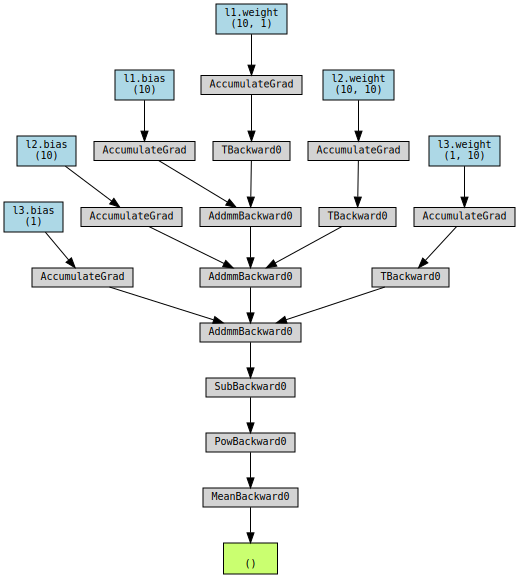

<generator object Module.named_parameters at 0x793853d6a640>
<generator object Module.named_parameters at 0x793853d6a640>
<generator object Module.named_parameters at 0x793853d6a640>


In [ ]:
!pip install japanize-matplotlib | tail -n 1

import matplotlib.pyplot as plt
import japanize_matplotlib

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['axes.grid'] = True

!pip install torchviz | tail -1
from torchviz import make_dot

import torch
from torch import nn
import numpy as np

#======================================================================#

np.random.seed(123)
x = np.random.randn(100,1)
y = x**2 + np.random.randn(100,1)*0.1
x_train = x[:50,:]
y_train = y[:50,:]
x_test = x[50:,:]
y_test = y[50:,:]

plt.scatter(x_train, y_train, c='b', label='訓練データ')
plt.scatter(x_test, y_test, c='k', marker='x', label='検証データ')
plt.legend()
plt.show()

#======================================================================#

def mse(Yp, Y):
    loss = ((Yp - Y)**2).mean()
    return loss

X = torch.tensor(x_train).float()
Y = torch.tensor(y_train).float()

l1 = nn.Linear(1, 10)
l2 = nn.Linear(10, 10)
l3 = nn.Linear(10, 1)

num_epochs = 500
lr = 0.001
import torch.optim as optim
optimizer = optim.SGD([l1.weight, l1.bias, l2.weight, l2.bias, l3.weight, l3.bias], lr=lr)
history = np.zeros((0,2))
for epoch in range(num_epochs):
    m1 = l1(X)
    m2 = l2(m1)
    Yp = l3(m2)
    loss = mse(Yp,Y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 10 == 0:
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        if epoch % 100 == 0:
            print(f'epoch = {epoch}  loss = {loss:.4f}')

#======================================================================#

XT = torch.tensor(x_test).float()
m1 = l1(XT)
m2 = l2(m1)
Yp = l3(m2)
plt.scatter(x_test, Yp.data.numpy(), c='b', label='予測値')
plt.scatter(x_test, y_test, c='k', marker='x', label='正解値')
plt.legend()
plt.show()

#======================================================================#

print('l1.weight = ', l1.weight.data.numpy())    # l1.weight =  [[-0.22513886] ...
print('l1.bias = ', l1.bias.data.numpy())        # l1.bias =  [ 0.5514908 ...
print('l2.weight = ', l2.weight.data.numpy())    # l2.weight =  [[-1.30503058e-01 ...
print('l2.bias = ', l2.bias.data.numpy())        # l2.bias =  [-1.3423176e-01
print('l3.weight = ', l3.weight.data.numpy())    # l3.weight =  [[ 0.009922
print('l3.bias = ', l3.bias.data.numpy())        # l3.bias =  [0.2669488]

print(f'初期状態： 損失：{history[0,1]:.4f}')    # 初期状態： 損失：6.8921
print(f'最終状態： 損失：{history[-1,1]:.4f}')   # 最終状態： 損失：3.2206

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線（損失）')
plt.show()

#======================================================================#

params = {
    "l1.weight": l1.weight,
    "l1.bias": l1.bias,
    "l2.weight": l2.weight,
    "l2.bias": l2.bias,
    "l3.weight": l3.weight,
    "l3.bias": l3.bias
}

dots = make_dot(loss, params=params)
display(dots)

print(l1.named_parameters())
print(l2.named_parameters())
print(l3.named_parameters())
